## Project: Data wrangling for "weratedogs" twitter account

## Table of Contents
- Introduction
- Gathering of data
- Assess
- Cleaning
- Exploratory Data Analysis
- Conclusions








### Introduction

#### About Data :-

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

#### Analysis :-

Data wrangling is done using three main concepts - Gather, assess and clean

#### Defining Libraries

In [11]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
% matplotlib inline
import re
from collections import Counter

Data from multiple sources are imported for analysis

In [12]:
#Importing twitter_archive
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#Importing data from given URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r =requests.get(url)

In [14]:
#Download the file from the above mentioned URL
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [15]:
#Save the dataframe
images = pd.read_csv('image-predictions.tsv', sep="\t")
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:

#Assign the twitter keys to access the data

consumer_key = "####"
consumer_secret = "####"
access_token = "####"
access_secret = "####"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [17]:
#Read the data from twitter using the Tweet id's which we have in the Twitter archive file

with open('tweet_json.txt', 'w', encoding='utf8') as outfile:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            continue

In [18]:
# Read json file created above line by line to create dataframe

tweets_json = []
file = open('tweet_json.txt', "r")
for line in file:
    try:
        tweet = json.loads(line)
        tweets_json.append(tweet)
    except:
        continue

file.close()

In [19]:
print(type(tweets_json))


<class 'list'>


In [20]:

df_tweets = pd.DataFrame(tweets_json)



### Assesing data

In [21]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:

df_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Daisy            7
Bailey           7
an               7
Toby             7
Buddy            7
Milo             6
Jax              6
Stanley          6
Rusty            6
Dave             6
Leo              6
Oscar            6
Jack             6
Scout            6
Bella            6
Koda             6
Bentley          5
              ... 
Stormy           1
Staniel          1
Cermet           1
Jarod            1
Shakespeare      1
Amélie           1
Rhino            1
Clarkus          1
Jackie           1
Antony           1
Kanu             1
Pherb            1
Clyde            1
Berb             1
Derby            1
Ralpher          1
his              1
Jordy            1
Tiger            1
Tess             1
Lilli            1
Combo       

In [23]:
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
# View rows in twitter_archive which contain '&amp;' instead of '&' in 'text' column
df_archive[df_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


Observations:

1) Dog stages in multiple columns

2) Timestamp is object.

3) Retweets might be identified by "in_reply_to_userid" and there "78" such replys.

4) Some of the columns with the name starting with "retweeted" with 181 non null values.

5) "Expanded_urls" have null values.


In [26]:
#Checking for the retweets

retweets_inreply = df_archive.query('in_reply_to_user_id != "NaN"')

retweets_inreply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      78 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     78 non-null object
source                        78 non-null object
text                          78 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 23 non-null object
rating_numerator              78 non-null int64
rating_denominator            78 non-null int64
name                          78 non-null object
doggo                         78 non-null object
floofer                       78 non-null object
pupper                        78 non-null object
puppo                         78 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 11.0+ KB

In [27]:
retweets_retweeted = df_archive.query('retweeted_status_user_id != "NaN"')

retweets_retweeted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
tweet_id                      181 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     181 non-null object
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: float64(4), int64(3), object(10)
memor

In [28]:
retweets_retweeted.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [29]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
df_archive.query('rating_numerator ==  1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


Observation: meaningful but inconsistent numerators and denominators

In [32]:
#Check the quality and tidiness of data fram "image_pred"
images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Observations:

1) Seems like there are values for other animals or species apart from the "Dog" in p1_dog, p2_dog and p3_dog

2) Missing image prediction for some tweets


In [33]:
#Check for the observations which has other than dog
no_dog_image = images.query('p1_dog != True & p2_dog != True & p3_dog != True')
no_dog_image['tweet_id'].count()

324

In [34]:

images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
#Assess the twitter downloaded data

df_tweets.head(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38074,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32681,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6151,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24592,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4070,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41431,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8471,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39611,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9166,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19885,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,3050,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11622,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,2022,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",64233,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,18475,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27322,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,4189,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31353,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,7221,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [36]:

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       886 non-null object
display_text_range               886 non-null object
entities                         886 non-null object
extended_entities                728 non-null object
favorite_count                   886 non-null int64
favorited                        886 non-null bool
full_text                        886 non-null object
geo                              0 non-null object
id                               886 non-null int64
id_str                           886 non-null object
in_reply_to_screen_name          32 non-null object
in_reply_to_status_id            32 non-null float64
in_reply_to_status_id_str        32 non-null object
in_reply_to_user_id              32 non-null float64
in_reply_to_user_id_str          32 non-null object
is_quot

In [37]:

df_tweets.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,886.000000,8.860000e+02,3.200000e+01,3.200000e+01,2.100000e+01,886.000000
mean,14567.916479,8.201100e+17,8.227168e+17,4.909540e+16,8.364933e+17,5143.812641
std,15305.929791,3.695467e+16,4.735314e+16,1.936930e+17,3.786469e+16,5766.020210
min,0.000000,7.588287e+17,6.671522e+17,1.185634e+07,7.591676e+17,0.000000
25%,5515.000000,7.893685e+17,8.016052e+17,2.843962e+07,8.065709e+17,2116.250000
50%,11141.000000,8.186017e+17,8.336668e+17,9.373564e+08,8.413114e+17,3509.500000
75%,20542.750000,8.482971e+17,8.558282e+17,4.196984e+09,8.710758e+17,6026.500000
max,140546.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,61044.000000


#### Quality

1) Timestamp is in "Object" type

2) Tweet_id should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.

3) Rename id to tweet_id in twitter data to maintain consistency across the multiple files

4) Check for the names of dog with None to No Name

5) Rename the best prediction column names

6) Proper case of the best prediction dog breeds

7) Consider the first probable case from the Image predictions file (i.e., P1)

8) Should keep only the original tweets and remove row with retweets.

9) Keep only the observations which are having in either of three predictions to be a "Dog" only (324) from twitter feed

10) Keep only wanted columns from the twitter downloaded data (api)

11) Most appropriate datatype for Rating_numerator must be float


#### Tidiness

1) To create a single dog stage column in stead of four different columns

2) Remove missing values from Dog stages

3) Need to create one single and master table with all these three tables information pulled together


### Cleaning

In [38]:
#Make a copy of all the three data frames
archive_copy=df_archive.copy()
image_copy=images.copy()
tweets_copy=df_tweets.copy()

In [39]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [40]:
tweets_copy.rename(columns = { 'id': 'tweet_id'}, inplace = True)

#### Define
All unwanted columns are removed

##### Code

In [41]:
tweets_copy.drop(['contributors','coordinates','display_text_range','entities','geo','place',
                   'quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink',
                  'retweeted_status','in_reply_to_screen_name','in_reply_to_status_id',
                   'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str' ], inplace = True, axis = 1)

##### Test

In [42]:
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 16 columns):
created_at                       886 non-null object
extended_entities                728 non-null object
favorite_count                   886 non-null int64
favorited                        886 non-null bool
full_text                        886 non-null object
tweet_id                         886 non-null int64
id_str                           886 non-null object
is_quote_status                  886 non-null bool
lang                             886 non-null object
possibly_sensitive               782 non-null object
possibly_sensitive_appealable    782 non-null object
retweet_count                    886 non-null int64
retweeted                        886 non-null bool
source                           886 non-null object
truncated                        886 non-null bool
user                             886 non-null object
dtypes: bool(4), int64(3), object(9)
memory usage: 86.6+ K

In [43]:
#Combine all the three datasets to create one master data frame
master_df = pd.merge(archive_copy, tweets_copy,
                        how = 'left', on = 'tweet_id')
master_df= pd.merge(master_df, image_copy,
                        how = 'left', on = 'tweet_id')

In [44]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
Changing Tweet_id to object

##### Code

In [45]:
master_df['tweet_id']= master_df['tweet_id'].astype(str)

#### Test

In [46]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 43 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            2

#### Define
Changing rating_numerator to float

##### Code

In [47]:
master_df['rating_numerator']= master_df['rating_numerator'].astype(float)

##### Test

In [48]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 43 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null float64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                           

#### Define
If reply_to_user_id is null means that this is the original tweet and not a reply So, we need to remove the observations with value populated in the above mentioned field

##### Code

In [49]:
master_df = master_df.query('in_reply_to_user_id == "NaN"')
master_df.tweet_id.count()

2278

##### Test

In [50]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 43 columns):
tweet_id                         2278 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_user_id              0 non-null float64
timestamp                        2278 non-null object
source_x                         2278 non-null object
text                             2278 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2274 non-null object
rating_numerator                 2278 non-null float64
rating_denominator               2278 non-null int64
name                             2278 non-null object
doggo                            2278 non-null object
floofer                          2278 non-null object
pupper                           2278 non-null object
puppo                            2

#### Define

If retweeted_status_user_id is null means that this is the original tweet and not a re-tweet

Unwanted columns like retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp along with the in_reply_to_user_id and in_reply_to_status_id should be dropped


##### Code

In [51]:
master_df = master_df.query('retweeted_status_id == "NaN"')

master_df.drop(['in_reply_to_user_id', 'in_reply_to_status_id','retweeted_status_id', 'retweeted_status_user_id',
    'retweeted_status_timestamp','expanded_urls','text'], inplace = True, axis = 1) 
master_df.tweet_id.count()


2097

##### Test

In [52]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 36 columns):
tweet_id                         2097 non-null object
timestamp                        2097 non-null object
source_x                         2097 non-null object
rating_numerator                 2097 non-null float64
rating_denominator               2097 non-null int64
name                             2097 non-null object
doggo                            2097 non-null object
floofer                          2097 non-null object
pupper                           2097 non-null object
puppo                            2097 non-null object
created_at                       698 non-null object
extended_entities                656 non-null object
favorite_count                   698 non-null float64
favorited                        698 non-null object
full_text                        698 non-null object
id_str                           698 non-null object
is_quote_status                  6

#### Define
Timestamp is an object. Converting it to Datetime

##### Code

In [53]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])

##### Test

In [54]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 36 columns):
tweet_id                         2097 non-null object
timestamp                        2097 non-null datetime64[ns]
source_x                         2097 non-null object
rating_numerator                 2097 non-null float64
rating_denominator               2097 non-null int64
name                             2097 non-null object
doggo                            2097 non-null object
floofer                          2097 non-null object
pupper                           2097 non-null object
puppo                            2097 non-null object
created_at                       698 non-null object
extended_entities                656 non-null object
favorite_count                   698 non-null float64
favorited                        698 non-null object
full_text                        698 non-null object
id_str                           698 non-null object
is_quote_status           

In [55]:
master_df[master_df.retweeted.isnull()]

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
900,758740312047005698,2016-07-28 19:06:01,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10,Boston,None,None,None,None,...,1.0,Chesapeake_Bay_retriever,0.848514,True,Labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
901,758474966123810816,2016-07-28 01:31:38,"<a href=""http://twitter.com/download/iphone"" r...",11.0,10,Brandonald,None,None,None,None,...,1.0,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,True
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",165.0,150,None,None,None,None,None,...,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
903,758405701903519748,2016-07-27 20:56:24,"<a href=""http://twitter.com/download/iphone"" r...",10.0,10,Odie,None,None,None,None,...,4.0,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
904,758355060040593408,2016-07-27 17:35:10,"<a href=""http://twitter.com/download/iphone"" r...",11.0,10,Corey,None,None,None,None,...,1.0,Pembroke,0.987643,True,Cardigan,0.012112,True,Siamese_cat,0.000117,False
905,758099635764359168,2016-07-27 00:40:12,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13.0,10,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,758041019896193024,2016-07-26 20:47:17,"<a href=""http://twitter.com/download/iphone"" r...",9.0,10,None,None,None,None,None,...,1.0,bookshop,0.794272,False,Cardigan,0.051265,True,Bernese_mountain_dog,0.026596,True
907,757741869644341248,2016-07-26 00:58:34,"<a href=""http://twitter.com/download/iphone"" r...",10.0,10,Leonard,None,None,None,None,...,1.0,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True
909,757725642876129280,2016-07-25 23:54:05,"<a href=""http://twitter.com/download/iphone"" r...",11.0,10,Beckham,None,None,None,None,...,2.0,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
910,757611664640446465,2016-07-25 16:21:11,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10,Cooper,None,None,None,None,...,1.0,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True


In [56]:
master_df.head()

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10,Phineas,None,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10,Tilly,None,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10,Archie,None,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10,Darla,None,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10,Franklin,None,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
Most of the dog names have been either None or a, which are all invalid (might not be captured correctly), hence we are renaming these entries to "No Name"

##### Code

In [57]:
master_df['name']=master_df['name'].replace({'None': 'No Name'}, regex=True)

In [58]:
master_df.loc[master_df.name == 'a','name'] = 'No Name'
master_df.loc[master_df.name == 'an','name'] = 'No Name'

##### Test

In [59]:
master_df.name.value_counts()


No Name     664
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
the           8
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Bella         6
Bo            6
Bailey        6
Jax           6
Oscar         6
Stanley       6
Koda          6
Buddy         5
Milo          5
Leo           5
Dave          5
Chester       5
Louis         5
Scout         5
Rusty         5
Bentley       5
Phil          4
           ... 
Jordy         1
Tiger         1
Tess          1
Lilli         1
Anakin        1
Combo         1
Kaia          1
Holly         1
Miley         1
Dylan         1
Lugan         1
Reptar        1
Eevee         1
Flash         1
Pubert        1
Mya           1
Rizzy         1
Aldrick       1
Sonny         1
Bell          1
Ike           1
Norman        1
Acro          1
Clifford      1
Jomathan      1
Tyrus         1
Sundance      1
Kody          1
Dot           1
Superpup      1
Name: name, Length: 953,

#### Define
Keep only the observations which are having in either of three predictions to be a "Dog" only (324) from the Image prediction file to have more meaning to the data frame

##### Code

In [60]:
master_df = master_df.query('p1_dog == True | p2_dog == True | p3_dog == True')

##### Test

In [61]:
master_df.query('p1_dog != True & p2_dog != True & p3_dog != True')['tweet_id'].count()

0

In [62]:
master_df.query('p1_dog == False')['tweet_id'].count()

203

#### Define
Keeping the best prediction p1 out of all the three predictions

##### Code

In [63]:
master_df = master_df.query('p1_dog == True')
master_df.drop(['p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog','img_num', 'jpg_url'], inplace = True, axis = 1)


##### Test

In [64]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2355
Data columns (total 28 columns):
tweet_id                         1463 non-null object
timestamp                        1463 non-null datetime64[ns]
source_x                         1463 non-null object
rating_numerator                 1463 non-null float64
rating_denominator               1463 non-null int64
name                             1463 non-null object
doggo                            1463 non-null object
floofer                          1463 non-null object
pupper                           1463 non-null object
puppo                            1463 non-null object
created_at                       527 non-null object
extended_entities                527 non-null object
favorite_count                   527 non-null float64
favorited                        527 non-null object
full_text                        527 non-null object
id_str                           527 non-null object
is_quote_status           

In [65]:
master_df.p1_dog.value_counts()

True    1463
Name: p1_dog, dtype: int64

#### Define
Proper case the breed name for the best prediction


##### Code

In [66]:
master_df.rename(columns = { 'p1': 'best_prediction','p1_conf': 'confidence_value'}, inplace = True)
master_df.best_prediction=master_df.best_prediction.str.title()
master_df.drop(['p1_dog'], inplace = True, axis = 1)

##### Test

In [67]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2355
Data columns (total 27 columns):
tweet_id                         1463 non-null object
timestamp                        1463 non-null datetime64[ns]
source_x                         1463 non-null object
rating_numerator                 1463 non-null float64
rating_denominator               1463 non-null int64
name                             1463 non-null object
doggo                            1463 non-null object
floofer                          1463 non-null object
pupper                           1463 non-null object
puppo                            1463 non-null object
created_at                       527 non-null object
extended_entities                527 non-null object
favorite_count                   527 non-null float64
favorited                        527 non-null object
full_text                        527 non-null object
id_str                           527 non-null object
is_quote_status           

### Tideness

#### Define 
Create a field with all the four of dog stages combined and remove the four unwanted stages columns from the data set

In [68]:
master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2355
Data columns (total 27 columns):
tweet_id                         1463 non-null object
timestamp                        1463 non-null datetime64[ns]
source_x                         1463 non-null object
rating_numerator                 1463 non-null float64
rating_denominator               1463 non-null int64
name                             1463 non-null object
doggo                            1463 non-null object
floofer                          1463 non-null object
pupper                           1463 non-null object
puppo                            1463 non-null object
created_at                       527 non-null object
extended_entities                527 non-null object
favorite_count                   527 non-null float64
favorited                        527 non-null object
full_text                        527 non-null object
id_str                           527 non-null object
is_quote_status           

##### Code

In [69]:
master_df.loc[master_df.doggo == 'None','doggo'] = ''
master_df.loc[master_df.floofer == 'None','floofer'] = ''
master_df.loc[master_df.pupper == 'None','pupper'] = ''
master_df.loc[master_df.puppo == 'None','puppo'] = ''

In [70]:
master_df["dog_stage"] = master_df['doggo'] + ' '+ master_df['floofer'] + ' '+ master_df['pupper'] + \
                             ' '+  master_df['puppo']

##### Test

In [71]:
master_df.dog_stage.value_counts()

                   1236
  pupper            144
doggo                48
   puppo             19
 floofer              7
doggo  pupper         7
doggo floofer         1
doggo   puppo         1
Name: dog_stage, dtype: int64

In [72]:
master_df.dog_stage=master_df.dog_stage.str.strip()
master_df.drop(['pupper','doggo','puppo','floofer'], inplace = True, axis = 1)

In [73]:
master_df.dog_stage.value_counts()

                 1236
pupper            144
doggo              48
puppo              19
doggo  pupper       7
floofer             7
doggo   puppo       1
doggo floofer       1
Name: dog_stage, dtype: int64

In [74]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2355
Data columns (total 24 columns):
tweet_id                         1463 non-null object
timestamp                        1463 non-null datetime64[ns]
source_x                         1463 non-null object
rating_numerator                 1463 non-null float64
rating_denominator               1463 non-null int64
name                             1463 non-null object
created_at                       527 non-null object
extended_entities                527 non-null object
favorite_count                   527 non-null float64
favorited                        527 non-null object
full_text                        527 non-null object
id_str                           527 non-null object
is_quote_status                  527 non-null object
lang                             527 non-null object
possibly_sensitive               527 non-null object
possibly_sensitive_appealable    527 non-null object
retweet_count                 

In [75]:
master_df.head()

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,created_at,extended_entities,favorite_count,favorited,...,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source_y,truncated,user,best_prediction,confidence_value,dog_stage
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10,Tilly,Tue Aug 01 00:17:27 +0000 2017,"{'media': [{'id': 892177413194625024, 'id_str'...",32681.0,False,...,False,False,6151.0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Chihuahua,0.323581,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10,Archie,Mon Jul 31 00:18:03 +0000 2017,"{'media': [{'id': 891815175371796480, 'id_str'...",24592.0,False,...,False,False,4070.0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Chihuahua,0.716012,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10,Franklin,Sat Jul 29 16:00:24 +0000 2017,"{'media': [{'id': 891327551943041024, 'id_str'...",39611.0,False,...,False,False,9166.0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Basset,0.555712,
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10,No Name,Sat Jul 29 00:08:17 +0000 2017,"{'media': [{'id': 891087942176911360, 'id_str'...",19885.0,False,...,False,False,3050.0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Chesapeake_Bay_Retriever,0.425595,
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10,Jax,Fri Jul 28 16:27:12 +0000 2017,"{'media': [{'id': 890971906207338496, 'id_str'...",11622.0,False,...,False,False,2022.0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Appenzeller,0.341703,


In [76]:
# First thing is to check how the dog stages & breeds are being placed in data frame (getting tweeted about)
master_df.best_prediction.value_counts()


Golden_Retriever                  137
Labrador_Retriever                 94
Pembroke                           88
Chihuahua                          78
Pug                                54
Chow                               41
Samoyed                            40
Pomeranian                         38
Toy_Poodle                         37
Malamute                           29
Cocker_Spaniel                     27
French_Bulldog                     26
Chesapeake_Bay_Retriever           23
Miniature_Pinscher                 21
Siberian_Husky                     20
German_Shepherd                    20
Staffordshire_Bullterrier          19
Shetland_Sheepdog                  18
Maltese_Dog                        18
Eskimo_Dog                         18
Shih-Tzu                           17
Beagle                             17
Cardigan                           17
Italian_Greyhound                  16
Rottweiler                         16
Lakeland_Terrier                   15
Kuvasz      

In [77]:
#Create a new data frame only with the dog stages to portray the graph
dog_stages = pd.DataFrame(master_df.dog_stage.value_counts().reset_index().values, columns=["dog_stage", "count"])
ft = dog_stages["dog_stage"] != ""
dog_stages = dog_stages[ft]
dog_stages

,dog_stage,count
1,pupper,144
2,doggo,48
3,puppo,19
4,doggo pupper,7
5,floofer,7
6,doggo puppo,1
7,doggo floofer,1


In [78]:
master_df.to_csv("twitter_archive_master.csv", encoding='utf-8', index=False)

#### Define
Remove any missing values from the dog stages

##### Code and Test

In [79]:
#Remove any missing values from the dog stages
master_df_1=master_df.query('dog_stage != ""')
dog_stages=master_df_1.groupby(['dog_stage']).count()['tweet_id']
dog_stages

dog_stage
doggo             48
doggo   puppo      1
doggo  pupper      7
doggo floofer      1
floofer            7
pupper           144
puppo             19
Name: tweet_id, dtype: int64

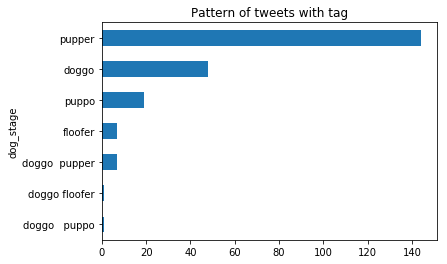

In [80]:
dog_stages = dog_stages.sort_values()
dog_stages.plot(kind='barh',title='Pattern of tweets with tag');



Pupper is the favourite dog stage which has got highest tweets amongst all the other stages followed by doggo and puppo


Plotting a scatter plot to understand the co relation between favourites and retweet counts


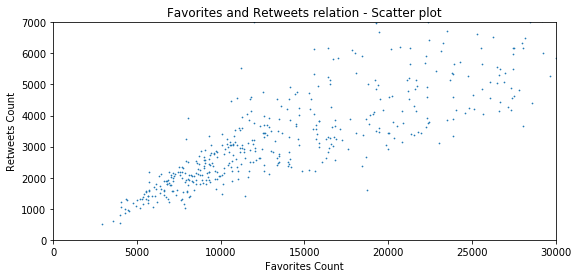

In [81]:
#Favorites and Retweets relation - Scatter plot
fig = plt.figure(figsize=(9,4))
plt.xlim(0, 30000)
plt.ylim(0, 7000)
plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')
plt.plot(master_df.favorite_count,master_df.retweet_count, linestyle='',marker='o', markersize=0.7)
plt.title('Favorites and Retweets relation - Scatter plot');

In [93]:
#Retweet count by dog stage
dt_df=master_df_1.groupby(['dog_stage']).sum()['retweet_count']

labels = []
denominator = dt_df.sum()

for index, count in enumerate(dt_df):
    label_first_part = dt_df.index.values[index]
    label_second_part = (count / denominator) * 100
    label_second_part = round(label_second_part, 2)
    label_second_part = str(label_second_part) + '%'
    label = label_first_part + ' ' + label_second_part
    labels.append(label)


/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left center". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


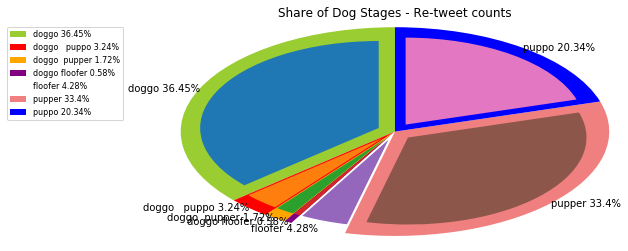

In [94]:
plt.figure(figsize=(8, 4))
colors = ['yellowgreen','red','Orange','Purple','white','lightcoral','blue','brown', 'darkgreen','yellow','grey','green','magenta','cyan']
porcent = 100.*dt_df/dt_df.sum()
patches, texts = plt.pie(dt_df, colors=colors, startangle=90, radius=1.2)
plt.pie(dt_df,labels=labels, 
        explode = (0.1,0.1,0.1,0.1, 0.1, 0.1, 0.1),shadow = True, startangle = 90)
plt.title('Share of Dog Stages - Re-tweet counts');
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

In [95]:
#Favourite count by dog stage
dt_df=master_df_1.groupby(['dog_stage']).sum()['favorite_count']

labels = []
denominator = dt_df.sum()

for index, count in enumerate(dt_df):
    label_first_part = dt_df.index.values[index]
    label_second_part = (count / denominator) * 100
    label_second_part = round(label_second_part, 2)
    label_second_part = str(label_second_part) + '%'
    label = label_first_part + ' ' + label_second_part
    labels.append(label)

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left center". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


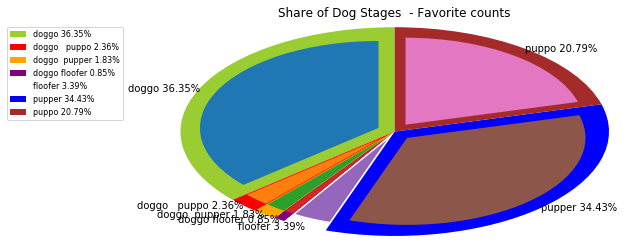

In [96]:
plt.figure(figsize=(8, 4))
colors = ['yellowgreen','red','Orange','Purple','white','blue','brown', 'darkgreen','yellow','grey','green','magenta','cyan']
porcent = 100.*dt_df/dt_df.sum()
patches, texts = plt.pie(dt_df, colors=colors, startangle=90, radius=1.2)
plt.pie(dt_df,labels=labels, 
        explode = (0.1,0.1,0.1,0.1, 0.1, 0.1, 0.1),shadow = True, startangle = 90)
plt.title('Share of Dog Stages  - Favorite counts');
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


Based on the above two charts, we can see that clearly "Doggo" stage is the most favourite by having most share of "Retweets" and " Favourites" in the handle.



### Conclusion




We can see that the Doggo stage is the highly re-tweeted, liked and favourited as well.

We also observe that # tweets from the archive file is having more records for "Puppo" (might be bacause the # records pulled from twitter api is very less (888))

We also observe that the "Golden Retriever" is the most tweeted dog breed amongst all the other breeds.

Finally, we can see that there is possitive corelation between the favourites and re-tweets which in turn can be depicted as if the number of re-tweets increase then there is possible chance of favourites and vice versa


In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])


0